LeveneResult(statistic=0.44713491252483883, pvalue=0.6395430051361456)


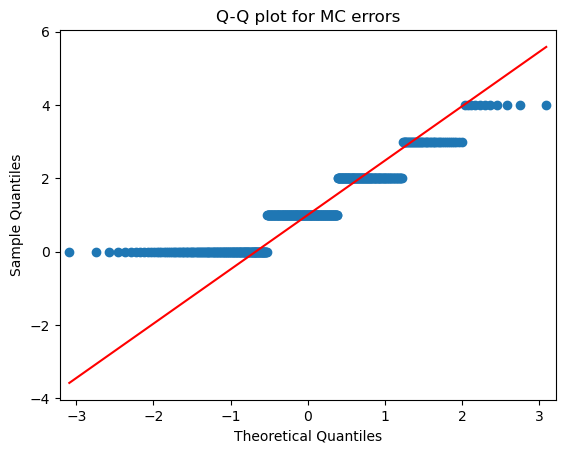

Kruskal-Wallis H test: 4.949655285256335, p-value: 0.08417749761930618


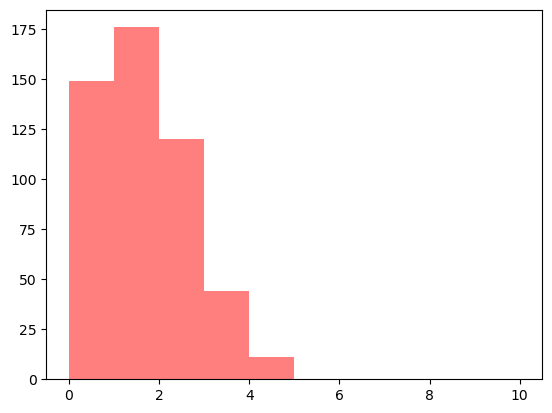

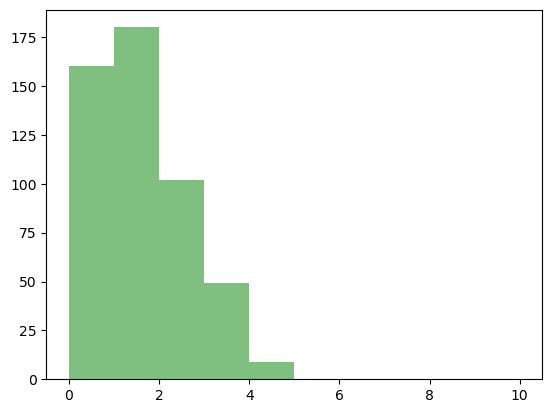

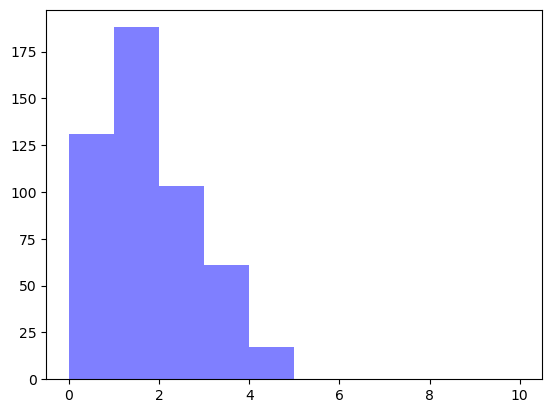

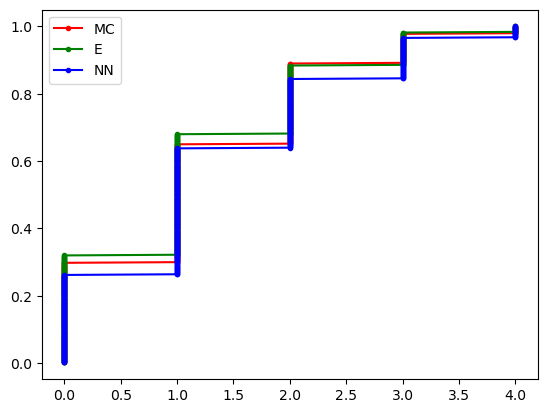

In [42]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt


with open('data_mc.csv') as data_mc:
    results_mc = data_mc.readlines()

with open('data_e.csv') as data_e:
    results_e = data_e.readlines()

with open('data_nn.csv') as data_nn:
    results_nn = data_nn.readlines()


#Input data into arrays
mc_errors = np.empty(len(results_mc))
for i in range(len(results_mc)):
    mc_errors[i] = int(results_mc[i][-2])

e_errors = np.empty(len(results_e))
for i in range(len(results_e)):
    e_errors[i] = int(results_e[i][-2])

nn_errors = np.empty(len(results_nn))
for i in range(len(results_nn)):
    nn_errors[i] = int(results_nn[i][-2])


# One way Anova test
y = np.empty(len(results_mc)*3)
for i in range(len(results_mc)):
    y[i] = int(results_mc[i][-2])
for i in range(len(results_e)):
    y[i+len(results_mc)] = int(results_e[i][-2])
for i in range(len(results_nn)):
    y[i+len(results_mc)+len(results_e)] = int(results_nn[i][-2])

#check for variance homogeneity
print(stats.levene(mc_errors, e_errors, nn_errors))

#check for normality with Q-Q plot
sm.qqplot(mc_errors, line='q', a=0.5)
plt.title("Q-Q plot for MC errors")
plt.show()

# Assumption of normality is not met, so we use Kruskal-Wallis H test

stat, p = stats.kruskal(mc_errors, e_errors, nn_errors)
print(f'Kruskal-Wallis H test: {stat}, p-value: {p}')


#Histograms of errors for all three groups
plt.hist(mc_errors, bins=range(0, 11), alpha=0.5, label='MC',color='r')
plt.show()
plt.hist(e_errors, bins=range(0, 11), alpha=0.5, label='E',color='g')
plt.show()
plt.hist(nn_errors, bins=range(0, 11), alpha=0.5, label='NN',color='b')
plt.show()


#ecdf for all three groups
x = np.sort(mc_errors)
y = np.arange(1, len(x)+1) / len(x)
plt.plot(x, y, marker='.', linestyle='solid', color='r')
z = np.sort(e_errors)
plt.plot(z, y, marker='.', linestyle='solid', color='g')
v = np.sort(nn_errors)
plt.plot(v, y, marker='.', linestyle='solid', color='b')
plt.legend(['MC', 'E', 'NN'])
plt.show()

